# Attacks in Mexico during elections

_Dataset comes from Harvard Dataverse (Trejo & Ley, 2019). References can be found at the end of this notebook._

The motivation for the dataset lies in a surprising wave of attacks characterized by high-profile violence and perpetrated by Mexican drug cartels. These attacks were directed against hundreds of political candidates between 2007 and 2012. 

The researchers suggest that the attacks were perpetrated in an attempt to establish criminal governance, demonstrating the vulnerability of Mexican politics.

## The data

The dataset [Dataset_HighProfileCriminalViolence.tab](Dataset_HighProfileCriminalViolence.tab) contains the number of attacks occurred to elected officials in Mexico between 2007 and 2012.

We will focus on:

- cve_inegi: Municipal INEGI code
- state: State name
- municipality: Municipality name
- year: Year
- aggr_sum: Total number of attacks (murders, murder attempts, kidnappings, and public threats) by organized crime against government officials and party candidates and activists per municipality-year
- elect_local: Election year at the local level (governor and/or mayor)

## Loading the data

We will extract:

- Mexican state codes (<em>state_code</em>)
- names (<em>state_name</em>)
- counts of attacks (_attacks_)
- years when **local** elections occurred (<em>local_election_years</em>)

and return a dictionary of dictionaries _ret_, mapping two digit state codes as strings to the extracted info.

In [46]:
# Imports

import csv
from pprint import pprint


def load(filename):

    # Declaring the variables that I need to return the correct dictionary
    ret = {}
    id_municipality = ''

    # Opening the file as f
    with open(filename, encoding='utf-8', newline='') as f:

        # Creating a new variable and I assign it a csv DictReader with delimiter='\t' and utf8 encoding
        my_reader = csv.DictReader(f, delimiter='\t')

        # Adding into the dictionary the codes of each municipality
        for row in my_reader:

            if len(row['cve_inegi']) == 4:
                id_municipality = "0" + row['cve_inegi'][0:1]
            else:
                id_municipality = row['cve_inegi'][0:2]

            # If id_municipality is already in ret, it updates the values
            # else, id_municipality is added in ret
            if id_municipality in ret:
                if row['elect_local'] == '1.0' and ret[id_municipality]['local_election_years'].count(int(row['year'])) < 1:
                    ret[id_municipality]['local_election_years'].append(
                        int(row['year']))

                if row['year'] == '2007':
                    ret[id_municipality]['attacks'][0] += int(row['aggr_sum'])
                if row['year'] == '2008':
                    ret[id_municipality]['attacks'][1] += int(row['aggr_sum'])
                if row['year'] == '2009':
                    ret[id_municipality]['attacks'][2] += int(row['aggr_sum'])
                if row['year'] == '2010':
                    ret[id_municipality]['attacks'][3] += int(row['aggr_sum'])
                if row['year'] == '2011':
                    ret[id_municipality]['attacks'][4] += int(row['aggr_sum'])
                if row['year'] == '2012':
                    ret[id_municipality]['attacks'][5] += int(row['aggr_sum'])
            else:
                ret[id_municipality] = {
                    'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [],
                    'state_code': id_municipality,
                    'state_name': row['state'],
                }
        
        for entities in ret:
            ret[entities]['local_election_years'] = sorted(ret[entities]['local_election_years'])

    return ret

mexico_db = load('Dataset_HighProfileCriminalViolence.tab')


Example of output:

            {'01': {'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [2007, 2010],
                    'state_code': '01',
                    'state_name': 'Aguascalientes'},
            '02': {'attacks': [1, 0, 1, 1, 0, 0],
                    'local_election_years': [2007, 2010],
                    'state_code': '02',
                    'state_name': 'Baja California'},
            '03': {'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [2008, 2011],
                    'state_code': '03',
                    'state_name': 'Baja California Sur'},

### Testing

In [47]:
from expected_mexico_db import expected_mexico_db
from pprint import pformat

for sid in expected_mexico_db.keys():
    if sid not in mexico_db: print('\nERROR: MISSING state', sid); break    
    for k in expected_mexico_db[sid]:
        if k not in mexico_db[sid]:
            print('\nERROR at state', sid,'\n\n   MISSING key:', k); break    
        if expected_mexico_db[sid][k] != mexico_db[sid][k]:
            print('\nERROR at state', sid, 'key:',k)
            print('  ACTUAL:\n', pformat(mexico_db[sid][k]))
            print('  EXPECTED:\n', pformat(expected_mexico_db[sid][k]))
            break

## Attacks visualization

Given a _state_code_ we will display a chart of the attack counts over the years.

Max attacks happened in any state: 39


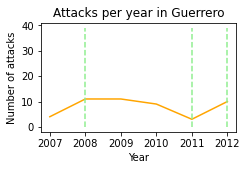

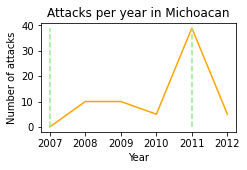

In [48]:
# Importing matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def max_attack_val(mexdb):
    max_val = 0
    for r in mexdb:
        max_val = max(max_val, max(mexdb[r]['attacks']))
    return max_val


def show_attacks(state_code, mexdb, val):

    plt.figure(figsize=(3.5,2))
                
    xs = range(2007, 2013)
    ys = mexdb[state_code]['attacks']
    
    plt.plot(xs, ys, color='orange')
    
    max_val = val
    
    plt.title("Attacks per year in" + " " +mexico_db[state_code]['state_name'])
    plt.xlabel('Year')
    plt.ylabel('Number of attacks')

    for year in mexdb[state_code]['local_election_years']:
        plt.plot([year, year], [0, max_val], color='lightgreen', linestyle='dashed')

print("Max attacks happened in any state:", max_attack_val(mexico_db))
show_attacks('12', mexico_db, max_attack_val(mexico_db)) # Guerrero
show_attacks('16', mexico_db, max_attack_val(mexico_db)) # Michoacan

## Cartels visualization

_TO BE IMPLEMENTED_

## References

- Trejo, Guillermo; Ley, Sandra, 2019, "Replication Data for: High-Profile Criminal Violence. Why Drug Cartels Murder Government Officials and Party Candidates in Mexico", 
https://doi.org/10.7910/DVN/VIXNNE, Harvard Dataverse, V1, UNF:6:BcqInKD9NBX3NkI48CdqpQ== [fileUNF]
